| ColumnName | Definition                                           |
|------------|------------------------------------------------------|
| Survived   | Whether Survived or not: 0 = No, 1 = Yes            |
| Pclass     | Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd             |
| Name       | Name of the Passenger                                |
| Sex        | Gender                                               |
| Age        | Age in Years                                         |
| SibSp      | No. of siblings / spouses aboard the Titanic        |
| Parch      | No. of parents / children aboard the Titanic        |
| Ticket     | Ticket number                                        |
| Fare       | Passenger fare                                       |
| Cabin      | Cabin number                                         |
| Embarked   | Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton |


#### Impoting Libraries:

In [39]:
# importing files for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing all required ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# to set fixed plot size in complete file
sns.set(rc = {'figure.figsize' : (12, 10)})

# to remove warning messages
import warnings 
warnings.filterwarnings("ignore")

#### Loading Dataset

In [40]:
data = pd.read_csv("titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Types of Features
1. Categorical - Sex, Embarked
2. Continuous - Age, Fare
3. Discrete - SibSp, Parch
4. AlphaNumeric - Cabin

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`` missing values in some columns.``

In [42]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Numerical Value Analysis

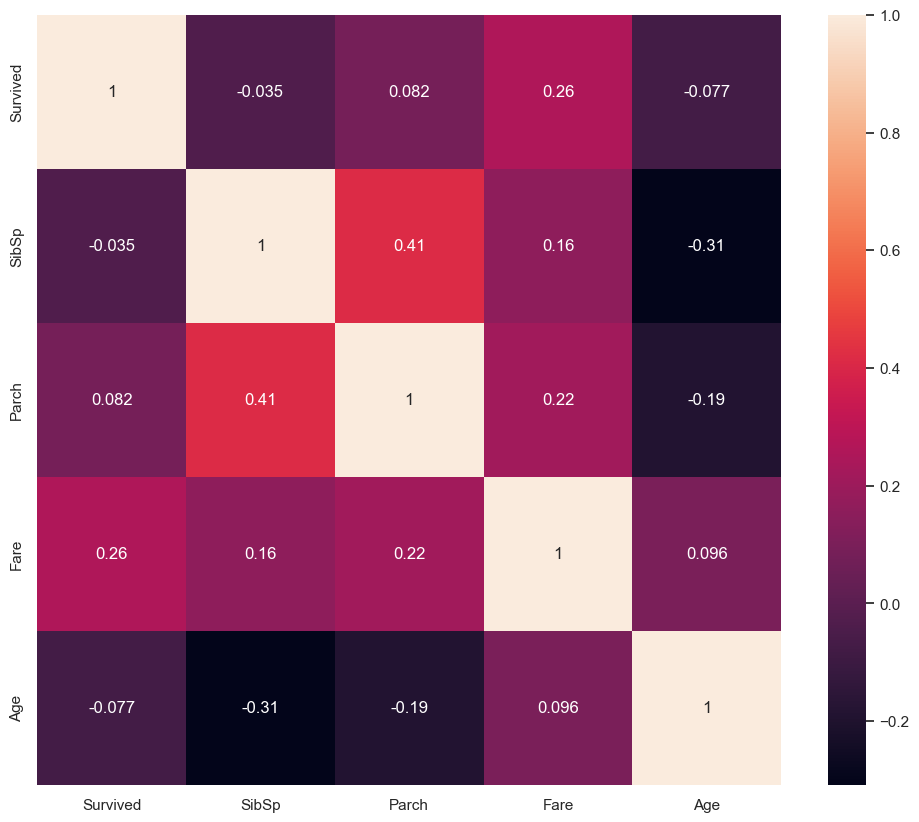

In [44]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

### <font color = "green">SibSp - Number of Siblings/spouse aboard the Titanic</font>

In [45]:
data['SibSp'].nunique()

7

In [46]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

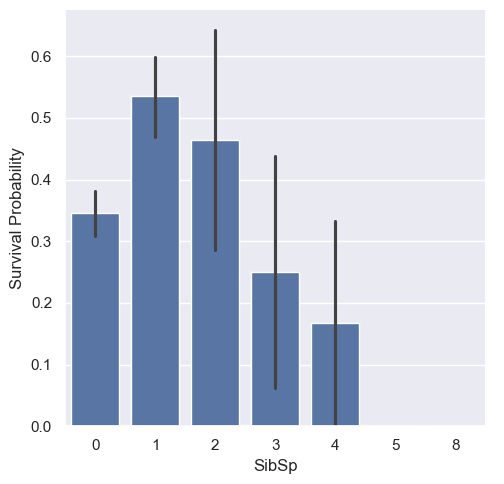

In [47]:
sns.catplot(x="SibSp", y="Survived", data=data, kind="bar").set_ylabels("Survival Probability")

### <font color = "green">Age</font>

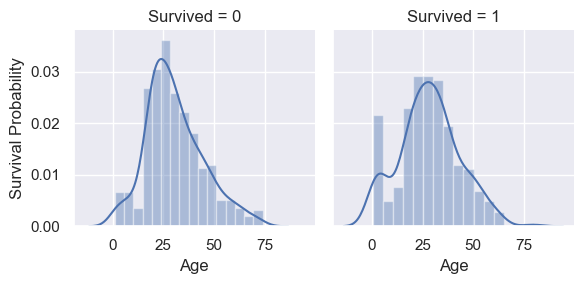

In [48]:
age_visual = sns.FacetGrid(data, col = "Survived")
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probability")

### <font color = "green"> Sex </font>

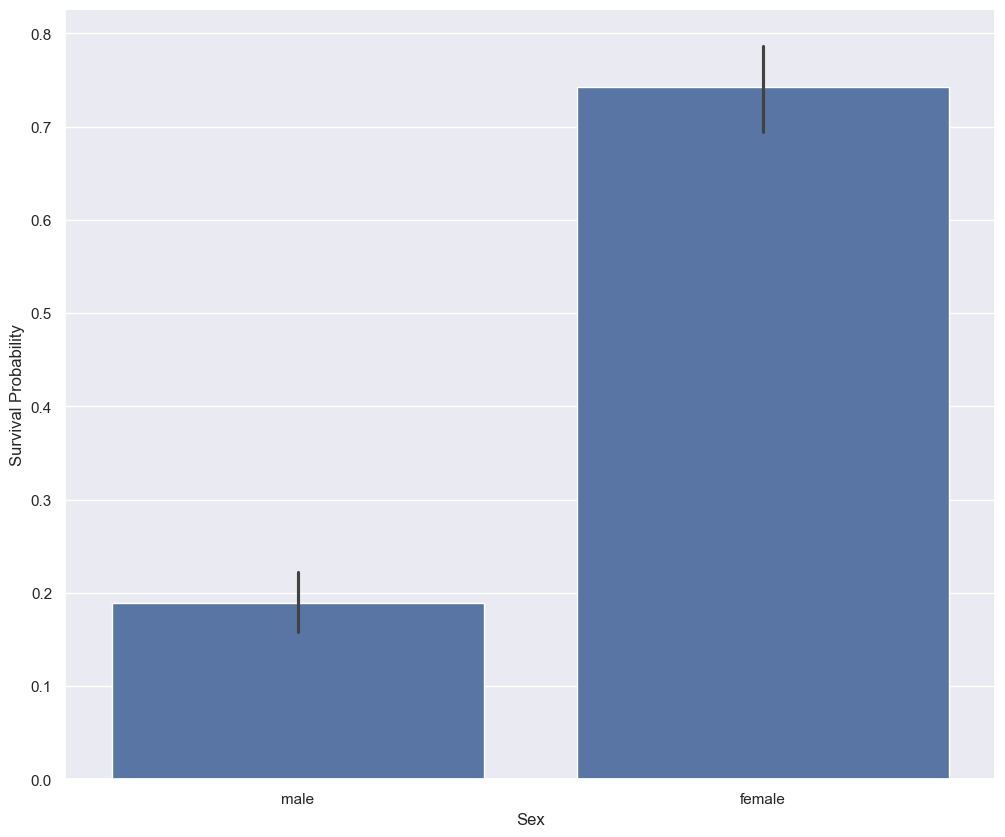

In [49]:
age_plot = sns.barplot(x = "Sex", y = "Survived", data = data).set_ylabel("Survival Probability")

In [50]:
data[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


``Females have 74.2% chances of survival and males have 18.9%.``

### <font color = "green">PClass : passenger class</font>

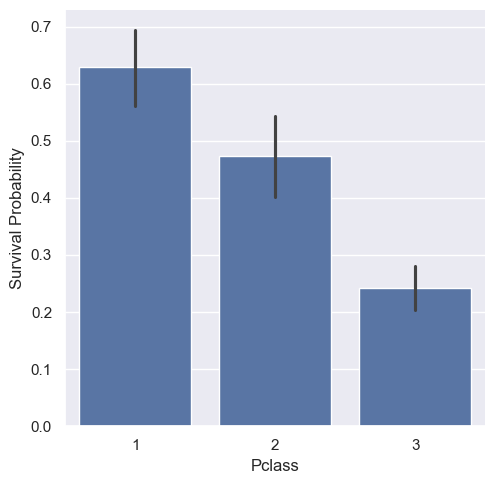

In [51]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data, kind="bar")
pclass = pclass.set_ylabels("Survival Probability")

`` Means survival prob. of elit class people were more as compared to lower classes.``

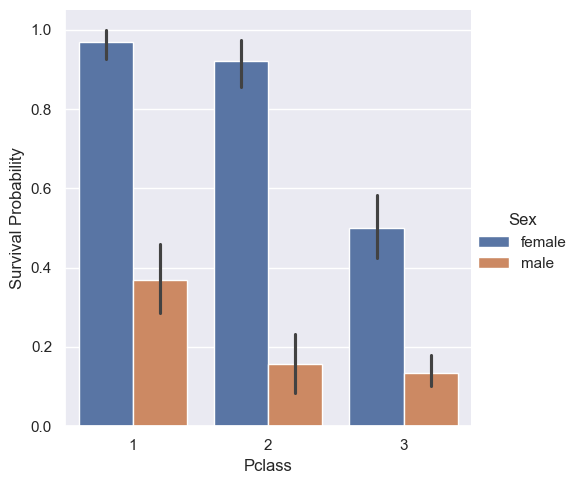

In [52]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data, kind="bar", hue = "Sex")
pclass = pclass.set_ylabels("Survival Probability")

`` Addding to elite female in elite class were having most survival chances than others.``

### <font color = "green"> Embarked </font>
``Check whether station from which passenger start their journey also affect their survival chances.``

In [53]:
data["Embarked"].isnull().sum()

2

In [54]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [55]:
# Fill the null value with S values only as being highest times ooccured.
data["Embarked"] = data["Embarked"].fillna("S")

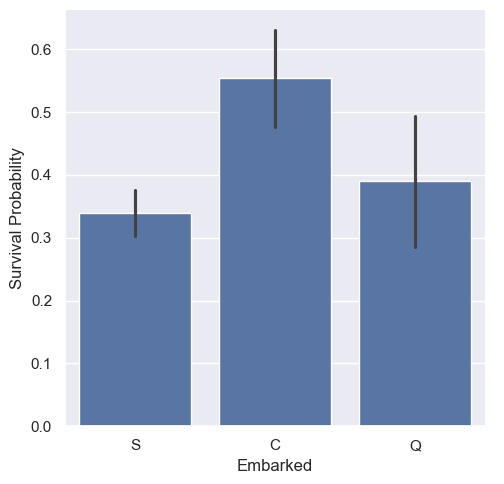

In [56]:
g = sns.catplot(x = "Embarked", y = "Survived", data = data, kind = "bar")
g = g.set_ylabels("Survival Probability")

### `` To understand why C Station has highest suurvival chances we need to plot graph in Pclass ,i.e passenger class.``

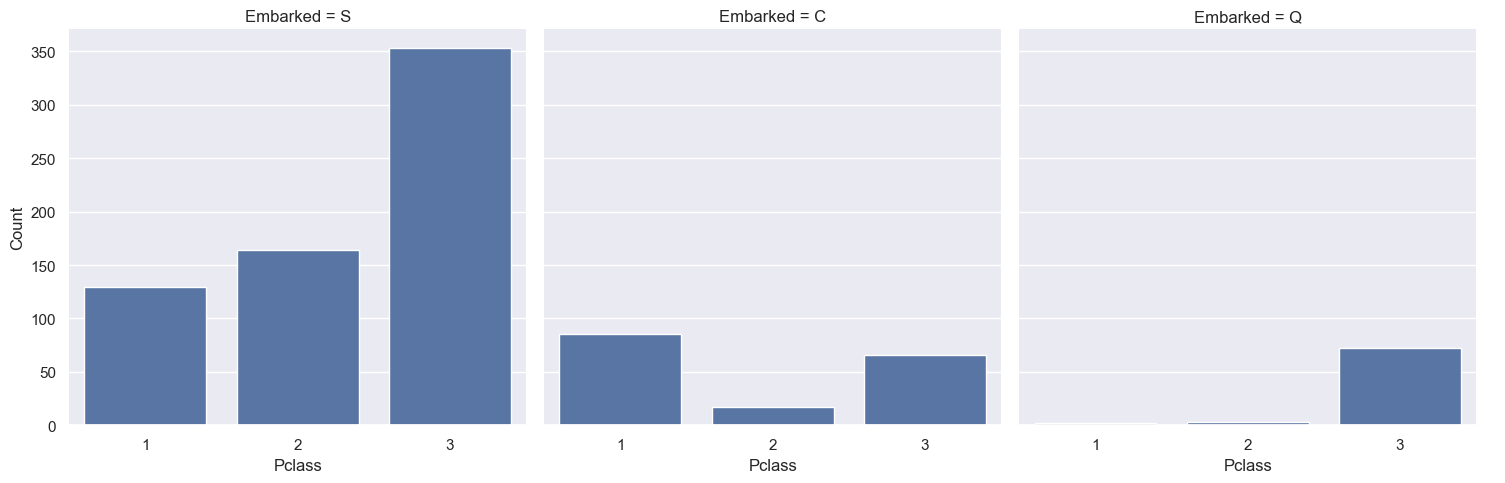

In [59]:
g = sns.catplot(x = "Pclass", col = "Embarked", data = data, kind = "count")
g.despine(left = True)
g = g.set_ylabels("Count")

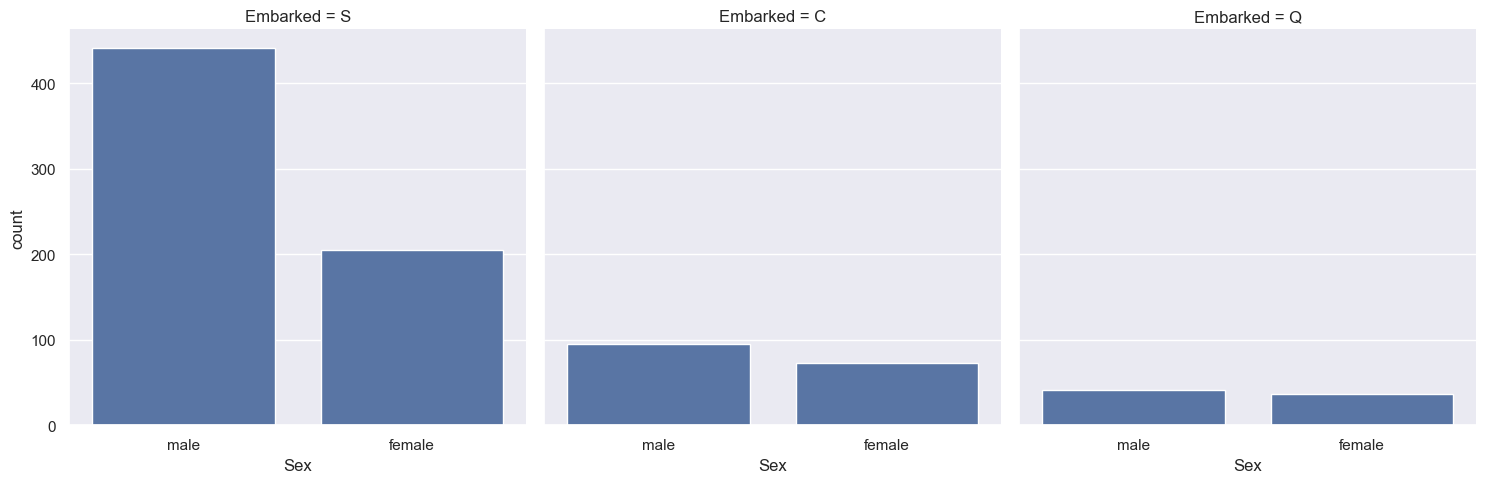

In [62]:
g = sns.catplot(x = "Sex",col = "Embarked", data = data, kind = "count")

### ``Becausse of Station C having more elite people in their station and number of male and females were equal thats why survival in C station person was highest.``

## <font color = "green">Preparing Data</font>

In [63]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [66]:
print("",mean, "\n", std, "\n", is_null)

 29.69911764705882 
 14.526497332334042 
 177


``we need to fill 177 null values in age column, we use (mean+std, mean-std) to place max. data under a particular curve in 1std. deviation which cover 68% of complete data.``

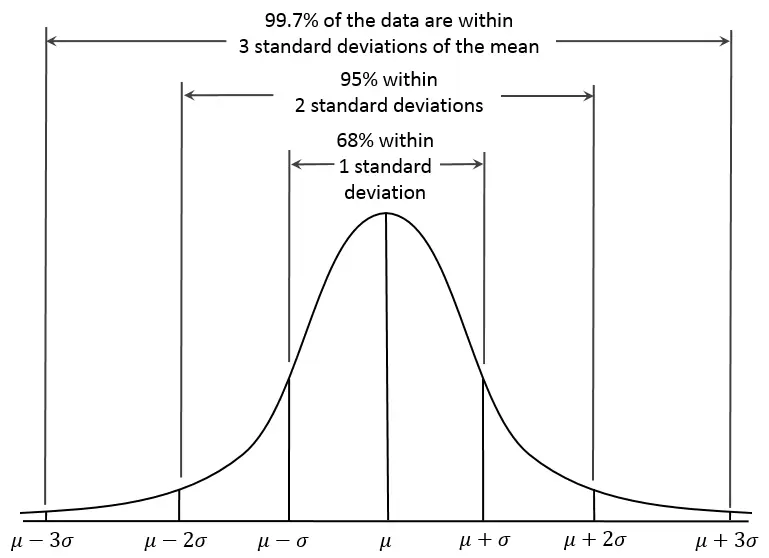

`` Generating random values b/w above told range.``

In [67]:
rand_age = np.random.randint(mean-std, mean+std, size = is_null)

In [68]:
rand_age

array([25, 30, 27, 27, 26, 41, 35, 16, 19, 20, 25, 32, 28, 26, 41, 15, 32,
       38, 20, 30, 43, 33, 30, 38, 16, 39, 20, 24, 15, 18, 29, 36, 21, 32,
       32, 42, 19, 33, 16, 42, 30, 39, 30, 23, 24, 22, 35, 28, 37, 43, 18,
       17, 33, 15, 21, 43, 42, 20, 32, 39, 30, 40, 28, 17, 32, 22, 34, 42,
       33, 20, 39, 31, 25, 35, 36, 32, 18, 28, 27, 25, 42, 40, 33, 31, 27,
       18, 27, 35, 25, 35, 34, 34, 16, 22, 27, 29, 29, 38, 25, 36, 20, 24,
       39, 16, 42, 20, 29, 39, 34, 15, 22, 27, 21, 23, 27, 38, 39, 39, 26,
       30, 17, 20, 36, 15, 27, 29, 20, 20, 16, 30, 36, 26, 26, 27, 36, 37,
       30, 43, 40, 28, 27, 37, 15, 28, 23, 28, 39, 25, 35, 17, 32, 28, 36,
       25, 17, 42, 18, 24, 20, 21, 25, 35, 19, 37, 33, 32, 39, 34, 30, 35,
       43, 19, 22, 41, 20, 41, 38])

In [69]:
type(rand_age)

numpy.ndarray

In [72]:
a = data['Age'].copy() #create a copy of Age column
a[np.isnan(a)] = rand_age #assign rand_age values to every row in a with True(null value present) in it.
data['Age'] = a #assign complete a to Age column

In [74]:
data['Age'].isnull().sum()

0

In [75]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    38.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [76]:
data["Embarked"] = data["Embarked"].fillna("S")

In [77]:
col_to_drop = ["PassengerId", "Cabin", "Ticket", "Name"]
data.drop(col_to_drop, axis = 1, inplace = True)
# drop useless columns

In [78]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


``Changing Gender and Ports to nuerical data as categorical are not able to understand by Model.``

In [79]:
gender = {"male" : 0, "female" : 1}
data['Sex'] = data["Sex"].map(gender)

In [80]:
ports = {"S": 0, "C" : 1, "Q": 2}
data["Embarked"] = data["Embarked"].map(ports)

In [81]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [82]:
# removing extra serial cloumn
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

### Splitting Data

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

### Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#### Classification

In [95]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
ktn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000)

In [96]:
logreg.fit(x_train, y_train)
svc_classifier.fit(x_train, y_train)
dt_classifier.fit(x_train, y_train)
ktn_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [98]:
logreg_ypred = logreg.predict(x_test)
svc_classifier_ypred = svc_classifier.predict(x_test)
dt_classifier_ypred = dt_classifier.predict(x_test)
ktn_classifier_ypred = ktn_classifier.predict(x_test) 
rf_classifier_ypred = rf_classifier.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, logreg_ypred)
svc_classifier_acc = accuracy_score(y_test, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(y_test, dt_classifier_ypred)
ktn_classifier_acc = accuracy_score(y_test, ktn_classifier_ypred)
rf_classifier_acc = accuracy_score(y_test, rf_classifier_ypred)

In [101]:
print("Logistic Regression: ", round(logreg_acc*100, 2))
print("Support Vector     : ", round(svc_classifier_acc*100, 2))
print("Decision Tree      : ", round(dt_classifier_acc*100, 2))
print("K-NN Classifier    : ", round(ktn_classifier_acc*100, 2))
print("Random Forest      : ", round(rf_classifier_acc*100, 2))

Logistic Regression:  80.6
Support Vector     :  81.34
Decision Tree      :  75.37
K-NN Classifier    :  79.48
Random Forest      :  81.72
